<a href="https://colab.research.google.com/github/blazaropinto/portfolio_PDA_Data_Science/blob/development/Visualising_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising the data

### Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name = 'Country Migration')
df.head(2)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78


In [5]:
df_net_migration = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]
mean_2015_2019 = df_net_migration.sum()
mean_2015_2019

net_per_10K_2015    1915.37
net_per_10K_2016     623.23
net_per_10K_2017    -332.97
net_per_10K_2018    -168.37
net_per_10K_2019     -94.34
dtype: float64

In [6]:
labels_mig = list(mean_2015_2019.keys())
labels_mig

['net_per_10K_2015',
 'net_per_10K_2016',
 'net_per_10K_2017',
 'net_per_10K_2018',
 'net_per_10K_2019']

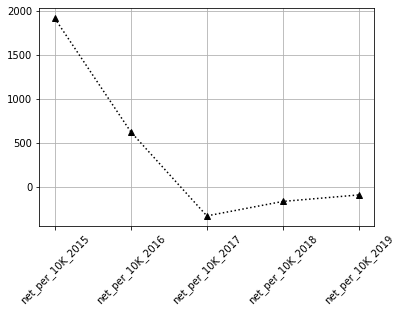

In [8]:
plt.plot(labels_mig, mean_2015_2019[labels_mig], '^k:' )
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Maximum net migration') to name your axis 
* display your bar graph with plt.show 

In [9]:
df_net_migration = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]
mig_sum = df_net_migration.max()
mig_sum

net_per_10K_2015    150.68
net_per_10K_2016    124.48
net_per_10K_2017     87.00
net_per_10K_2018     91.41
net_per_10K_2019     87.71
dtype: float64

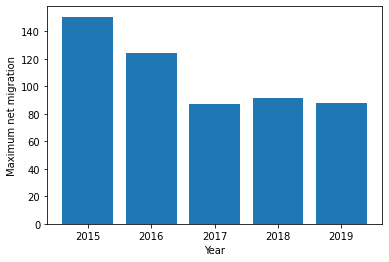

In [10]:
labels_count = ['2015','2016','2017','2018','2019']
plt.bar(labels_count, mig_sum)
plt.xlabel('Year')
plt.ylabel('Maximum net migration')
plt.show()

### Creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

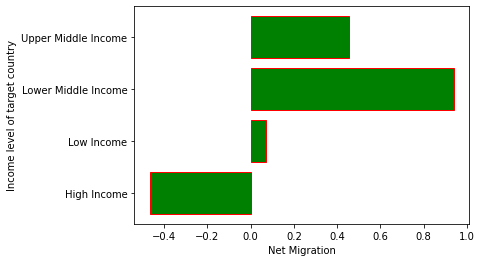

In [11]:
means_inc2019 = df.groupby('target_country_wb_income')['net_per_10K_2019'].mean()
labels_inc2019 = means_inc2019.keys()
plt.barh(labels_inc2019, means_inc2019, color='g', edgecolor='r')
plt.xlabel('Net Migration')
plt.ylabel('Income level of target country')
plt.show()

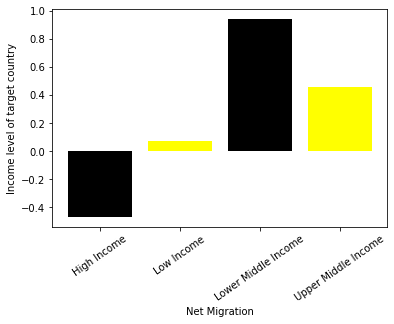

In [12]:
plt.bar(labels_inc2019, means_inc2019, color=['black', 'yellow'])
plt.xlabel('Net Migration')
plt.ylabel('Income level of target country')
plt.xticks(rotation=35)
plt.show()

### Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to the previous exercise - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




In [13]:
psycho_url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22'
psych_data = pd.read_csv(psycho_url)
psych_data.head(2)

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.6,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.6,29,10,37,9,16,10,2017


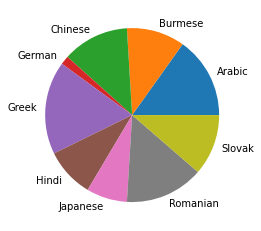

In [14]:
psy_bylanguage = psych_data.groupby('firstlanguage').mean()
psy_data = psy_bylanguage.Stress
psy_labels = psy_data.keys()
plt.pie(psy_data, labels = psy_labels)
plt.show()

--> Lots of languages missing in this data (spoken by lots of people)...

--> We cannot get any actual conclusion out of just this one graph.. (germans are relaxed or badly represented?)

### Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot 
*  show the boxplot

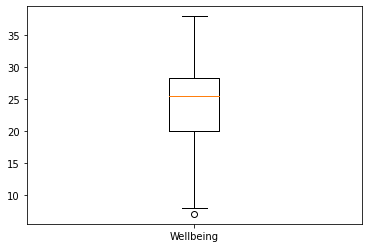

In [15]:
data_w = psych_data.Wellbeing
plt.boxplot(data_w, labels=['Wellbeing'])
plt.show()

### Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


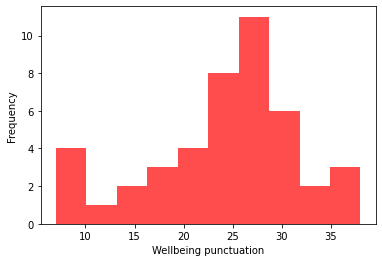

In [16]:
plt.hist(data_w, color='red', alpha=0.7)
plt.xlabel('Wellbeing punctuation')
plt.ylabel('Frequency')
plt.show()

### Create a scatterplot of Wellbeing and Stress with line of best fit
---

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create **y** from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress 
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept) 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




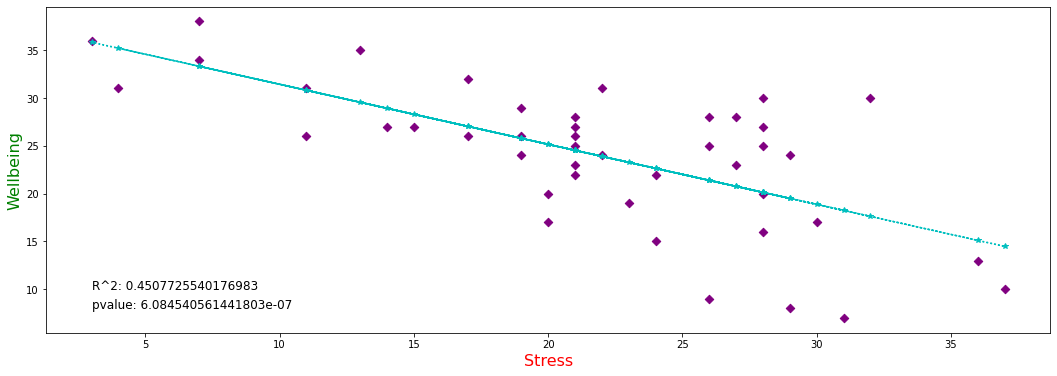

In [18]:
x = psych_data.Stress
y = psych_data.Wellbeing

plt.figure(figsize=(18,6))
plt.scatter(x,y, c='purple', marker='D')

regression_sw = linregress(x,y)
slope = regression_sw.slope
intercept = regression_sw.intercept
plt.plot(x, slope*x + intercept, '*c:')

plt.xlabel('Stress', color='red', fontsize=16) 
plt.ylabel('Wellbeing', color='green', fontsize=16)
plt.text(3,8, 'pvalue: '+ str(regression_sw.pvalue), fontsize=12)
plt.text(3,10, 'R^2: '+ str(regression_sw.rvalue**2), fontsize=12)

plt.show()

## Data story
---

By observing the **purple dots** (i.e. the actual data) we can notice a correlation between the 2 variables: *the level of wellbeing decreases as the level of stress increases*. 

The **light blue line** represents the data model, which according to the R squared value account for a good percentage of the variability of the data. Besides, the extremely low p value tells the model is *statistically significant*, so these **variables are inversely correlated**.

In other words, the data is showing that an increase in the wellbeing of people is **related** to a reduction in reducing their levels of stress, or that higher levels of stress is related to lower feelings of wellbeing. In any case, these data does **not** tell one variable increasing is **causing** the other to decrease nor it is telling us anything about the directionality of this relation.